In [1]:
%matplotlib inline
import numpy as np
import numpy.random as random
import math as math
import matplotlib.pyplot as plt
import scipy.linalg as splin
from mpl_toolkits.mplot3d import proj3d
from mpl_toolkits.mplot3d import Axes3D
import copy as copy
import math
import pickle
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import datetime

In [2]:
def saveThing(thing,file):
    with open(file,'wb') as fil:
        pick = pickle.Pickler(fil,protocol=4)
        pick.dump(thing)
        pick.clear_memo()
def openThing(file):
    with open(file,'rb') as fil:
        pick = pickle.Unpickler(fil)
        thing = pick.load()
    return thing

1D Vandermonde

In [3]:
def useParams(thetaList,M=1):
    if sum([A for lam,A in thetaList]) < M:
        return True
    return False

def evalPoints(xList,thetaList):
    return [sum([A*np.exp(-lam*x) for lam,A in thetaList]) for x in xList]

In [4]:
def trianglePlot(arry,clist,emphPoints = [],dim=2,title=''):
    
    ranges = [arry[:,idx].max()-arry[:,idx].min() for idx in range(dim+1)]
    axesDist = 0.6*max(ranges)
    
    figs,axs = plt.subplots(nrows=dim,ncols=dim,figsize=(15,15))
    plt.suptitle(title)
    for row in range(dim-1,-1,-1):
        for col in range(dim-1,-1,-1):
            if col >= row:
                py = arry[:,row]
                px = arry[:,col+1]
                
                centerX = (px.max()+px.min())/2
                centerY = (py.max()+py.min())/2
                
                sc1 = axs[row,col].scatter(px,py,s=5,c=clist,edgecolor='black',linewidth=0.2, cmap='plasma')
                for p in emphPoints:
                    axs[row,col].scatter([px[0]],[py[0]],s=100,c='C1',edgecolor='black',linewidth=0.2)
                
                axs[row,col].set_xlim([centerX-axesDist,centerX+axesDist])
                axs[row,col].set_ylim([centerY-axesDist,centerY+axesDist])
                if row != col:
                    axs[row,col].set_xticks([])
                    axs[row,col].set_yticks([])
                if row == col:
                    axs[row,col].set_ylabel('dir '+str(row+1))
                    axs[row,col].set_xlabel('dir '+str(col+2))
                axs[row,col].ticklabel_format(style='sci',scilimits=(-2,2),axis='both')
            else:
                axs[row,col].axis('off')
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()
    
def trianglePlotBound(arry,clist,radii,radius,emphPoints = [],dim=2,title=''):
    
    axesDist = 1.05*radius*radii[0]
    
    theta = np.linspace(0, 2 * np.pi, 100)
    perim = np.array([radius*np.cos(theta),radius*np.sin(theta)])
    
    figs,axs = plt.subplots(nrows=dim,ncols=dim,figsize=(15,15))
    plt.suptitle(title)
    for row in range(dim-1,-1,-1):
        for col in range(dim-1,-1,-1):
            if col >= row:
                py = arry[:,row]
                px = arry[:,col+1]
                
                ellipse = np.dot(np.diag([radii[col+1],radii[row]]),perim)
                
                centerX = (px.max()+px.min())/2
                centerY = (py.max()+py.min())/2
                
                sc1 = axs[row,col].scatter(px,py,s=1,c=clist,edgecolor='black',linewidth=0.1, cmap='plasma')
                sc2 = axs[row,col].plot(ellipse[0],ellipse[1],c='C0')
                for p in emphPoints:
                    axs[row,col].scatter([px[0]],[py[0]],s=100,c='C1',edgecolor='black',linewidth=0.2)
                
                axs[row,col].set_xlim([-axesDist,axesDist])
                axs[row,col].set_ylim([-axesDist,axesDist])
                if row != col:
                    axs[row,col].set_xticks([])
                    axs[row,col].set_yticks([])
                if row == col:
                    axs[row,col].set_ylabel('dir '+str(row+1))
                    axs[row,col].set_xlabel('dir '+str(col+2))
                axs[row,col].ticklabel_format(style='sci',scilimits=(-2,2),axis='both')
            else:
                axs[row,col].axis('off')
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

In [5]:
def Tn(x,n):
    deg = [0.0 for i in range(n+1)]
    deg[n] = 1
    return np.polynomial.chebyshev.chebval(x,deg)

def JCheb(xList,rho,n=0):
    if n == 0:
        n = len(xList)
    return np.array([[rho**(-d)*Tn(x,d) for d in range(n)] for x in xList])

In [6]:
nX = 3
xList = np.linspace(0,1,nX)
nParams = 4
ARange = 1
lambdaRange = 2
M = 1
print(xList)

sampledPoints0 = []
iterations = 10**6
for idx in range(iterations):
    thetaList = np.array([[lambdaRange*np.random.random(),ARange*np.random.random()] for x in range(nParams)])
    if useParams(thetaList,M=M):
        pointDict = {'thetaList':thetaList,'xList':xList,'pointVals':evalPoints(xList,thetaList)}
        sampledPoints0.append(pointDict)
    if (idx > 1) and (idx%(iterations/10) == 1):
        print(len(sampledPoints0),' points')
        print('acceptance ratio of ',len(sampledPoints0)/(idx+1))

[ 0.   0.5  1. ]
4191  points
acceptance ratio of  0.041909161816763664
8256  points
acceptance ratio of  0.04127958720412796
12474  points
acceptance ratio of  0.04157972280184799
16705  points
acceptance ratio of  0.041762291188544055
20955  points
acceptance ratio of  0.04190983236067056
25170  points
acceptance ratio of  0.04194986016713278
29309  points
acceptance ratio of  0.04186988037177037
33543  points
acceptance ratio of  0.041928645178387056
37766  points
acceptance ratio of  0.04196212897304673


In [7]:
#sampledPoints0 = openThing('1DexponentialSampling.pckl')

In [8]:
#saveThing(sampledPoints0,'1DexponentialSampling_21Points.pckl')

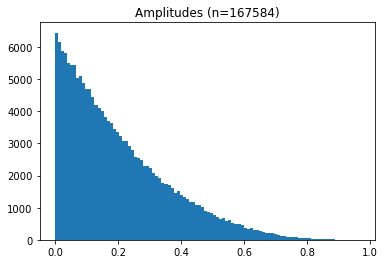

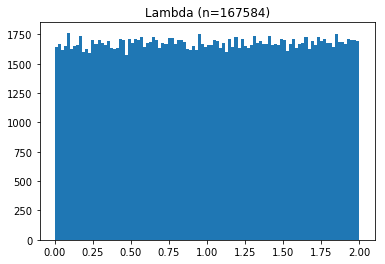

In [9]:
nBins = 100

AList = []
lambdaList = []
for p in sampledPoints0:
    lambdaList.extend(list(p['thetaList'][:,0]))
    AList.extend(list(p['thetaList'][:,1]))

n, bins, patches = plt.hist(AList,bins=nBins)
plt.title('Amplitudes (n='+str(len(AList))+')')
plt.show()

n, bins, patches = plt.hist(lambdaList,bins=nBins)
plt.title('Lambda (n='+str(len(lambdaList))+')')
plt.show()

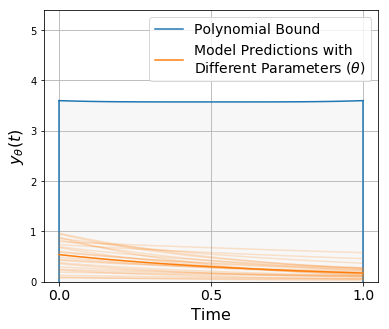

In [10]:
xList = np.linspace(min(sampledPoints0[0]['xList']),max(sampledPoints0[0]['xList']),51)
xShifted = xList-(max(xList)+min(xList))/2

X = JCheb(xShifted,2,n=len(sampledPoints0[0]['xList']))

radius = 2*M*np.sqrt(len(sampledPoints0[0]['xList']))
upper = [np.dot(row,radius*row/np.linalg.norm(row)) for row in X]
lower = [0.0 for x in xList]

plotSamples = []
for i in range(100):
    for sample in sampledPoints0:
        thetas = sample['thetaList']
        if (sum(thetas[:,1]) > i*nParams/100) and (sum(thetas[:,1]) < (i+1)*nParams/100):
            plotSamples.append(sample)
            break

plt.figure(figsize=(6,5))

plt.fill_between(xList,[0.0 for x in xList],upper,color='black',alpha=0.03)

plt.plot(xList,upper,label='Polynomial Bound')
plt.plot([xList[0],xList[0]],[0,upper[0]],c='C0')
plt.plot([xList[-1],xList[-1]],[0,upper[-1]],c='C0')

for p in plotSamples:
    y = evalPoints(xList,p['thetaList'])
    plt.plot(xList,y,c='C1',alpha=0.2)

p = plotSamples[math.ceil(len(plotSamples)/2)]
y = evalPoints(xList,p['thetaList'])
plt.plot(xList,y,c='C1',label='Model Predictions with \nDifferent Parameters ('+r'$\theta$'+')')

xList = sampledPoints0[0]['xList']
plt.xticks(xList,fontsize=14)
plt.grid()

plt.legend(loc='upper right',fontsize=14)
    
plt.ylabel(r'$y_{\theta}(t)$',fontsize=16)
plt.xlabel('Time',fontsize=16)

#plt.yticks([np.sqrt(3)],[r'$\sqrt{3}$'])

#plt.xlim([0,1])
plt.ylim([0,1.5*max(upper)])

#plt.savefig('exponential_manifold_C.png')
plt.show()

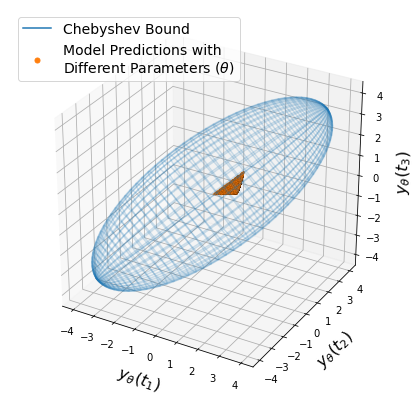

In [11]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

### WIREFRAME ###
xList = np.array(sampledPoints0[0]['xList'])
xShifted = xList - (max(xList)+min(xList))/2
xShifted = xShifted/max(xShifted)
rho = 2
J = JCheb(xShifted,rho)
u,s,vt = np.linalg.svd(J)

theta = np.linspace(0, 2 * np.pi, 200)
phi = np.linspace(0, np.pi, 200)

radius = 2*M*np.sqrt(len(xList))
x = radius*np.outer(np.cos(theta), np.sin(phi))
y = radius*np.outer(np.sin(theta), np.sin(phi))
z = radius*np.outer(np.ones_like(theta), np.cos(phi))

x_rot = copy.deepcopy(x)
y_rot = copy.deepcopy(y)
z_rot = copy.deepcopy(z)

Jacob = np.dot(np.dot(u,np.diag(s)),[[0,0,1],[0,1,0],[1,0,0]]) #np.dot(np.diag(s[0:3]),[[0,0,1],[0,1,0],[1,0,0]])
for i in range(len(x_rot)):
    for j in range(len(x_rot[0])):
        vect = [x_rot[i][j],y_rot[i][j],z_rot[i][j]]
        vect_rot = np.dot(Jacob,vect)
        x_rot[i][j] = vect_rot[0]
        y_rot[i][j] = vect_rot[1]
        z_rot[i][j] = vect_rot[2]

ax.plot_wireframe(x_rot, y_rot, z_rot, rstride=5, cstride=4, alpha=0.2)

### MODEL MANIFOLD ###

proj = np.array([p['pointVals'] for p in sampledPoints0])

pointsX = proj[:,0]
pointsY = proj[:,1]
pointsZ = proj[:,2]

ax.scatter3D(pointsX,pointsY,pointsZ,color='C1',s=2,edgecolor='black',linewidth=0.1)

# Adjustment of the axes, so that they all have the same span:
max_range = 1.1*max([np.dot(row,radius*row/np.linalg.norm(row)) for row in J])

for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_range, max_range))
    
#for angle in range(0,360,20):
#    ax.view_init(30,angle)
#    plt.savefig('rotating/'+str(angle)+'.png')

ax.set_xlabel('\n'+r'$y_{\theta}(t_1)$',fontsize=16)
ax.set_ylabel('\n'+r'$y_{\theta}(t_2)$',fontsize=16)
ax.set_zlabel('\n'+r'$y_{\theta}(t_3)$',fontsize=16)


label0 = mlines.Line2D([], [], color='C0', label='Chebyshev Bound')
label1 = mlines.Line2D([], [], color='C1',marker='o',linewidth=0, markersize=5, label='Model Predictions with \nDifferent Parameters ('+r'$\theta$'+')')
plt.legend(handles=[label0,label1],fontsize=14,loc = 'upper left')


#fig.savefig('exponential_manifold_B.png')
#ax.view_init(48,185)
#fig.savefig('exponential_manifold_A.png')

plt.show()


In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

### WIREFRAME ###
xList = np.array(sampledPoints0[0]['xList'])/max(sampledPoints0[0]['xList'])
xList = xList - sum(xList)/len(xList)
rho = 2
J = JCheb(xList,rho)
u,s,vt = np.linalg.svd(J)

theta = np.linspace(0, 2 * np.pi, 200)
phi = np.linspace(0, np.pi, 200)

radius = ARange*nParams
x = radius*np.outer(np.cos(theta), np.sin(phi))
y = radius*np.outer(np.sin(theta), np.sin(phi))
z = radius*np.outer(np.ones_like(theta), np.cos(phi))

x_rot = copy.deepcopy(x)
y_rot = copy.deepcopy(y)
z_rot = copy.deepcopy(z)

Jacob = np.dot(np.diag(s[0:3]),[[0,0,1],[0,1,0],[1,0,0]])
for i in range(len(x_rot)):
    for j in range(len(x_rot[0])):
        vect = [x_rot[i][j],y_rot[i][j],z_rot[i][j]]
        vect_rot = np.dot(Jacob,vect)
        x_rot[i][j] = vect_rot[2]
        y_rot[i][j] = vect_rot[1]
        z_rot[i][j] = vect_rot[0]

ax.plot_wireframe(x_rot, y_rot, z_rot, rstride=5, cstride=4, alpha=0.2,label='Bound from Chebychev')

### MODEL MANIFOLD ###

proj = np.dot([p['pointVals'] for p in sampledPoints0],u)

pointsX = proj[:,2]
pointsY = proj[:,1]
pointsZ = proj[:,0]

ax.scatter3D(pointsX,pointsY,pointsZ,color='C1',edgecolors='black',s=1,linewidth=0.1,label='Model Predictions')

# Adjustment of the axes, so that they all have the same span:
max_radius = radius*s[0]
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))
#ax.view_init(0,0)
#ax.set_xlabel('first time point')
#ax.set_ylabel('second time point')
#ax.set_zlabel('third time point')

plt.show()
#trianglePlotBound(proj,['C1' for p in sampledPoints0],s,len(xList),dim=4)

In [ ]:
lengths = np.array([max(proj[:,i])-min(proj[:,i]) for i in range(proj.shape[1])])
polyLengths = 2*radius*s

plt.figure(figsize=(5,5))
plt.plot([i for i in range(len(polyLengths))],polyLengths,label='Chebychev Bound',marker='o')
plt.plot([i for i in range(len(lengths))],lengths,label='Model Manifold',marker='o')
plt.yscale('log')
#limits = np.array([min([min(x) for x in [lengths, polyLengths]]),max([max(x) for x in [lengths, polyLengths]])])
#plt.ylim(limits)
#plt.xticks([0,1,2],['Longest\nEllipsoid Axis','Middle\n Ellipsoid Axis','Shortest\nEllipsoid Axis'],fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Ordered Principal Components',fontsize=16)
plt.ylabel('Prediction Space Distance',fontsize=16)
plt.title('Manifold Lengths\nAlong Different Directions',fontsize=20)
plt.legend(fontsize=14,loc='lower left')
plt.show()

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

### WIREFRAME ###
xList = np.array(sampledPoints0[0]['xList'])/max(sampledPoints0[0]['xList'])
xList = xList - (max(xList)+min(xList))/2
V = np.array([[x**n for n in range(len(xList))] for x in xList])
u,s,vt = np.linalg.svd(V)

theta = np.linspace(0, 2 * np.pi, 200)
phi = np.linspace(0, np.pi, 200)

radius = np.sqrt(len(xList))
x = radius*np.outer(np.cos(theta), np.sin(phi))
y = radius*np.outer(np.sin(theta), np.sin(phi))
z = radius*np.outer(np.ones_like(theta), np.cos(phi))

x_rot = copy.deepcopy(x)
y_rot = copy.deepcopy(y)
z_rot = copy.deepcopy(z)

Jacob = np.dot(np.dot(u,np.diag(s)),[[0,0,1],[0,1,0],[1,0,0]])#np.dot(np.diag(s[0:3]),[[0,0,1],[0,1,0],[1,0,0]])
for i in range(len(x_rot)):
    for j in range(len(x_rot[0])):
        vect = [x_rot[i][j],y_rot[i][j],z_rot[i][j]]
        vect_rot = np.dot(Jacob,vect)
        x_rot[i][j] = vect_rot[0]
        y_rot[i][j] = vect_rot[1]
        z_rot[i][j] = vect_rot[2]

ax.plot_wireframe(x_rot, y_rot, z_rot, rstride=5, cstride=4, alpha=0.2)

### MODEL MANIFOLD ###

proj = np.array([p['pointVals'] for p in sampledPoints0])

pointsX = proj[:,0]
pointsY = proj[:,1]
pointsZ = proj[:,2]

ax.scatter3D(pointsX,pointsY,pointsZ,color='C1',edgecolor='black',linewidth=0.1)

# Adjustment of the axes, so that they all have the same span:
max_range = 1.1*max([max(pointsX),max(pointsY),max(pointsZ)])
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_range, max_range))
    
#for angle in range(0,360,20):
#    ax.view_init(30,angle)
#    plt.savefig('rotating/'+str(angle)+'.png')

ax.set_xlabel('\n'+r'$y_{\theta}(t_1)$',fontsize=16)
ax.set_ylabel('\n'+r'$y_{\theta}(t_2)$',fontsize=16)
ax.set_zlabel('\n'+r'$y_{\theta}(t_3)$',fontsize=16)


label0 = mlines.Line2D([], [], color='C0', label='Polynomial Bound')
label1 = mlines.Line2D([], [], color='C1',marker='o',linewidth=0, markersize=5, label='Model Predictions with \nDifferent Parameters ('+r'$\theta$'+')')
plt.legend(handles=[label0,label1],fontsize=14)


#fig.savefig('exponential_manifold_B.png')
#ax.view_init(48,185)
#fig.savefig('exponential_manifold_A.png')

plt.show()


In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

### WIREFRAME ###
xList = np.array(sampledPoints0[0]['xList'])/max(sampledPoints0[0]['xList'])
xList = xList - sum(xList)/len(xList)
V = np.array([[x**n for n in range(len(xList))] for x in xList])
u,s,vt = np.linalg.svd(V)

theta = np.linspace(0, 2 * np.pi, 200)
phi = np.linspace(0, np.pi, 200)

radius = np.sqrt(len(xList))
x = radius*np.outer(np.cos(theta), np.sin(phi))
y = radius*np.outer(np.sin(theta), np.sin(phi))
z = radius*np.outer(np.ones_like(theta), np.cos(phi))

x_rot = copy.deepcopy(x)
y_rot = copy.deepcopy(y)
z_rot = copy.deepcopy(z)

Jacob = np.dot(np.diag(s[0:3]),[[0,0,1],[0,1,0],[1,0,0]])
for i in range(len(x_rot)):
    for j in range(len(x_rot[0])):
        vect = [x_rot[i][j],y_rot[i][j],z_rot[i][j]]
        vect_rot = np.dot(Jacob,vect)
        x_rot[i][j] = vect_rot[2]
        y_rot[i][j] = vect_rot[1]
        z_rot[i][j] = vect_rot[0]

ax.plot_wireframe(x_rot, y_rot, z_rot, rstride=5, cstride=4, alpha=0.2,label='Bound from Polynomial Fits')

### MODEL MANIFOLD ###

proj = np.dot([p['pointVals'] for p in sampledPoints0],u)

pointsX = proj[:,2]
pointsY = -proj[:,1]
pointsZ = -proj[:,0]

ax.scatter3D(pointsX,pointsY,pointsZ,color='C1',edgecolors='black',linewidth=0.1,label='Model Predictions')

# Adjustment of the axes, so that they all have the same span:
max_radius = np.sqrt(len(xList))*s[0]
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))
ax.view_init(0,0)
#ax.set_xlabel('first time point')
#ax.set_ylabel('second time point')
#ax.set_zlabel('third time point')

plt.show()
#trianglePlotBound(proj,['C1' for p in sampledPoints0],s,len(xList),dim=4)

In [ ]:
lengths = np.array([max(proj[:,i])-min(proj[:,i]) for i in range(proj.shape[1])])
polyLengths = 2*np.sqrt(len(xList))*s

plt.figure(figsize=(5,5))
plt.plot([i for i in range(len(polyLengths))],polyLengths,label='Polynomial Bound\n'+r'($2\sqrt{3}\sigma_i$)',marker='o')
plt.plot([i for i in range(len(lengths))],lengths,label='Model Manifold',marker='o')
plt.yscale('log')
#limits = np.array([min([min(x) for x in [lengths, polyLengths]]),max([max(x) for x in [lengths, polyLengths]])])
#plt.ylim(limits)
plt.xticks([0,1,2],['Longest\nEllipsoid Axis','Middle\n Ellipsoid Axis','Shortest\nEllipsoid Axis'],fontsize=14)
plt.yticks(fontsize=14)
#plt.xlabel('Ordered Principal Components',fontsize=16)
plt.ylabel('Prediction Space Distance',fontsize=16)
plt.title('Manifold Lengths\nAlong Different Directions',fontsize=20)
plt.legend(fontsize=14,loc='lower left')
plt.show()

In [ ]:
plt.figure(figsize=(4,8))
for e in s:
    plt.plot([0,1],[e**2,e**2],c='C0')
plt.yscale('log')
plt.title('Vandermonde Singular Values')
plt.show()

2D Vandermonde

In [ ]:
def singularVals2D(xList,thetaList):
    J = []
    for lam,A,B in thetaList:
        J.append([np.exp(-lam*x*np.exp(-B*beta)) for x,beta in xList])
        J.append([-A*x*np.exp(-B*beta-lam*x*np.exp(-B*beta)) for x,beta in xList])
        J.append([A*lam*x*beta * np.exp(-B*beta-lam*x*np.exp(-B*beta)) for x,beta in xList])
    J = np.array(J).T
    u,s,vt = np.linalg.svd(J)
    return J,s

def evalPoints2D(xList,thetaList):
    return [sum([A*np.exp(-lam*x*np.exp(-B*beta)) for lam,A,B in thetaList]) for x,beta in xList]

def cMat(n,m,mMax):
    c = np.diag([1.0 for i in range(mMax)])
    for i in range(1,mMax):
        c[i][0] = (-1)**i * n**i
    for i in range(2,mMax):
        for j in range(1,i):
            c[i][j] = c[i-1][j-1]-(n+j)*c[i-1][j]
    return c

def Vandermonde2D(xList,deg=0):
    """
    Returns a 2D vandermonde for polynomials up to degree P
    """
    if deg > 0:
        P = deg
    else:
        P = polyDeg(xList)
    polyList = []
    for p in range(P+1):
        for n in range(p+1):
            polyList.append([n,p-n])
    return [[x**n * beta**m for n,m in polyList] for x,beta in xList]

def polyDeg(xList):
    return math.ceil(np.sqrt(1/4+2*len(xList))-3/2)

def useParams2D(xList,thetaList):
    P = polyDeg(xList)
    
    termSum = 0.0
    for p in range(P+1):
        for n in range(p+1):
            termSum += (1/(math.factorial(n)*math.factorial(p-n))*sum([A * B**(p-n) * lam**n * n**(p-n) for lam,A,B in thetaList]))**2
    if termSum < (P+2)*(P+1)/2:
        return True
    return False
    
    return P

In [ ]:
nX = 3
nBeta = 5
xRange = np.linspace(0,2,nX)
betaRange = np.linspace(0,2,nBeta)
xList = [[x,beta] for x in xRange for beta in betaRange]

nParams = 4
ARange = 3
lambdaRange = 3
BRange = 5.5


In [ ]:
sampledPoints2D = []
time1 = datetime.datetime.now()
iterations = 2*10**8
for idx in range(iterations):
    thetaList = np.array([[lambdaRange*np.random.random(),ARange*np.random.random(),BRange*np.random.random()] for x in range(nParams)])
    if useParams2D(xList,thetaList):
        pointDict = {'thetaList':thetaList,'xList':xList,'pointVals':evalPoints2D(xList,thetaList)}
        sampledPoints2D.append(pointDict)
    if idx%(iterations/10) == 1:
        print(len(sampledPoints2D),' points')
        print('acceptance ratio of ',len(sampledPoints2D)/(idx+1))
time2 = datetime.datetime.now()
print(time2-time1)

In [ ]:
#saveThing(sampledPoints2D,'2DexponentialSampling_15Points.pckl')
sampledPoints2D = openThing('2DexponentialSampling.pckl')
len(sampledPoints2D)

In [ ]:
#xRange = np.linspace(0,1,nX)
#betaRange = np.linspace(0,1,nBeta)
#xList = [[x,beta] for x in xRange for beta in betaRange]
#eigList2D = []
for p in sampledPoints2D:
    #p.update({'xList':xList})
    p.update({'pointVals':evalPoints2D(p['xList'],p['thetaList'])})
    #p.update({'R':RMat(p['thetaList'],100)})
    #J,s = singularVals2D(p['xList'],p['thetaList'])
    #p.update({'J':J,'s':s})
    #eigList2D.extend(list(s**2))

In [ ]:
plotSamples = []
for i in range(10):
    for sample in sampledPoints2D:
        thetas = sample['thetaList']
        if (sum(thetas[:,1]) > i*4/10) and (sum(thetas[:,1]) < (i+1)*4/10):
            plotSamples.append(sample)
            break

In [ ]:
XRange = np.linspace(0,1,31)
YRange = np.linspace(0,1,31)

xList = sampledPoints2D[0]['xList']

X,Y = np.meshgrid(XRange,YRange)

plotPoints = np.array([[x,y] for x in XRange for y in YRange])

shiftedPoints = [[plotPoints[i][0]-sum(XRange)/len(XRange),plotPoints[i][1]-sum(YRange)/len(YRange)] for i in range(len(plotPoints))]
V = np.array(Vandermonde2D(shiftedPoints,deg=polyDeg(xList)))

DOF = len(xList)

upper = np.array([np.dot(row,np.sqrt(DOF)*row/np.linalg.norm(row)) for row in V])
upper = np.array([np.sqrt(DOF)*np.linalg.norm(row) for row in V])

ZSphere = np.array([[upper[i*len(XRange)+j] for i in range(len(XRange))] for j in range(len(YRange))])


fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

fact = 1

XRange = fact*XRange
YRange = fact*YRange
plotPoints = fact*plotPoints

X,Y = np.meshgrid(XRange,YRange)

X1 = [[fact,fact] for x in range(X.shape[1])]
Y1 = [[y,y] for y in Y[:,-1]]
Z1 = [[z,0.0] for z in ZSphere[:,-1]]
    
X2 = [[0.0,0.0] for x in range(X.shape[1])]
Y2 = [[y,y] for y in Y[:,0]]
Z2 = [[z,0.0] for z in ZSphere[:,0]]
    
X3 = [[x,x] for x in X[0]]
Y3 = [[fact,fact] for y in range(Y.shape[0])]
Z3 = [[z,0.0] for z in ZSphere[-1]]
    
X4 = [[x,x] for x in X[0]]
Y4 = [[0.0,0.0] for y in range(Y.shape[0])]
Z4 = [[z,0.0] for z in ZSphere[0]]

ax.plot_surface(X1,Y1,Z1,color='black',alpha=0.1)
ax.plot_wireframe(X1,Y1,Z1,color='C0',rstride=len(X1))
ax.plot_surface(X2,Y2,Z2,color='black',alpha=0.1)
ax.plot_wireframe(X2,Y2,Z2,color='C0',rstride=len(X2))
ax.plot_surface(X3,Y3,Z3,color='black',alpha=0.1)
ax.plot_wireframe(X3,Y3,Z3,color='C0',rstride=len(X3))
ax.plot_surface(X4,Y4,Z4,color='black',alpha=0.1)
ax.plot_wireframe(X4,Y4,Z4,color='C0',rstride=len(X4))

for p in plotSamples:
    pointVals = evalPoints2D(plotPoints,p['thetaList'])
    Z = np.array([[pointVals[i*len(XRange)+j] for i in range(len(XRange))] for j in range(len(YRange))])

    ax.plot_surface(X,Y,Z,color='C1',alpha=0.4)
    
thetaList = np.array([[np.sqrt(15)*0.02,np.sqrt(15),np.sqrt(15)*0.02]])
pointVals = evalPoints2D(plotPoints,thetaList)
Z = np.array([[pointVals[i*len(XRange)+j] for i in range(len(XRange))] for j in range(len(YRange))])
ax.plot_surface(X,Y,Z,color='C1',alpha=0.4)
    
p = plotSamples[math.ceil(len(plotSamples)/2)]
pointVals = evalPoints2D(plotPoints,p['thetaList'])
Z = np.array([[pointVals[i*len(XRange)+j] for i in range(len(XRange))] for j in range(len(YRange))])
ax.plot_surface(X,Y,Z,color='C1')

ax.plot_surface(X,Y,ZSphere,color='C0')

#ax.set_xlim([0,1])
#ax.set_ylim([0,1])

ax.set_xticks([0,0.5,1])
ax.set_xticklabels([r'$t_1=0$',r'$t_2=0.5$',r'$t_3=1$'])
ax.set_yticks([0,0.25,0.5,0.75,1])
ax.set_yticklabels([r'$\beta_1=0$',r'$\beta_2=0.25$',r'$\beta_3=0.5$',r'$\beta_4=0.75$',r'$\beta_5=1$'])

"""ax.set_xticks([0,1,2])
ax.set_xticklabels([r'$t_1=0$',r'$t_2=1$',r'$t_3=2$'])
ax.set_yticks([0,0.5,1,1.5,2])
ax.set_yticklabels([r'$\beta_1=0$',r'$\beta_2=0.5$',r'$\beta_3=1$',r'$\beta_4=1.5$',r'$\beta_5=2$'])"""

ax.set_zticks([np.sqrt(len(xList))])
ax.set_zticklabels([r'$\sqrt{15}$'])
    
ax.set_xlabel('\nTime',fontsize=14)
ax.set_ylabel('\nInverse Temperature',fontsize=14)
ax.set_zlabel('\n'+r'$y_{\theta}(t,\beta)$',fontsize=14)

ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_zlim([0,5])

#ax.view_init(30,-130)

label0 = mpatches.Patch(color='C0', label='Polynomial Bound')
label1 = mpatches.Patch(color='C1', label='Model Predictions with \nDifferent Parameters ('+r'$\theta$'+')')
plt.legend(handles=[label0,label1],fontsize=14)

#plt.savefig('exponential2D_manifold_C.png')

plt.show()

In [ ]:
nBins = 100

AList = []
lambdaList = []
BList = []
for p in sampledPoints2D:
    lambdaList.extend(list(p['thetaList'][:,0]))
    AList.extend(list(p['thetaList'][:,1]))
    BList.extend(list(p['thetaList'][:,2]))

n, bins, patches = plt.hist(AList,bins=nBins)
plt.title('Amplitudes (n='+str(len(AList))+')')
plt.show()

n, bins, patches = plt.hist(lambdaList,bins=nBins)
plt.title('Lambda (n='+str(len(lambdaList))+')')
plt.show()

n, bins, patches = plt.hist(BList,bins=nBins)
plt.title('Activation Energy (n='+str(len(BList))+')')
plt.show()

In [ ]:
max(AList)

In [ ]:
plt.figure(figsize=(14,8))

nBins = 500
bins = np.linspace(np.log(min(eigList2D)),np.log(max(eigList2D)),nBins)
bins = np.exp(bins)
n, bins, patches = plt.hist(eigList2D,bins=bins,normed=1,alpha=0.7,label='Jacobians time and Temp (n = '+str(len(eigList2D))+')')

plt.title('Eigvalues with '+str(len(xList))+' points and '+str(3*nParams)+' parameters')
plt.xscale('log')
plt.yscale('log')

plt.legend()

plt.show()

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

### WIREFRAME ###
xList = np.array(sampledPoints2D[0]['xList'])

xListShifted = xList - np.array([(max(row)+min(row))/2 for row in xList.T])

V = Vandermonde2D(xListShifted)
u,s,vt = np.linalg.svd(V)

xListRand = np.random.rand(len(xList),2)
xListRand = xListRand - np.array([(max(row)-min(row))/2 for row in xListRand.T])

uRand,sRand,vRandt = np.linalg.svd(Vandermonde2D(xListRand))

theta = np.linspace(0, 2 * np.pi, 100)
phi = np.linspace(0, np.pi, 100)

P = polyDeg(xList)
radius = np.sqrt((P+2)*(P+1)/2)
x = radius*np.outer(np.cos(theta), np.sin(phi))
y = radius*np.outer(np.sin(theta), np.sin(phi))
z = radius*np.outer(np.ones_like(theta), np.cos(phi))

x_rot = copy.deepcopy(x)
y_rot = copy.deepcopy(y)
z_rot = copy.deepcopy(z)

Jacob = np.dot(np.diag(sRand[0:3]),[[0,0,1],[0,1,0],[1,0,0]])
for i in range(len(x_rot)):
    for j in range(len(x_rot[0])):
        vect = [x_rot[i][j],y_rot[i][j],z_rot[i][j]]
        vect_rot = np.dot(Jacob,vect)
        x_rot[i][j] = vect_rot[2]
        y_rot[i][j] = vect_rot[1]
        z_rot[i][j] = vect_rot[0]

ax.plot_wireframe(x_rot, y_rot, z_rot, rstride=3, cstride=3, alpha=0.2,label='Bound from Polynomial Fits')

### MODEL MANIFOLD ###

proj = np.dot([p['pointVals'] for p in sampledPoints2D],u)

pointsX = proj[:,2]
pointsY = proj[:,1]
pointsZ = -proj[:,0]

ax.scatter3D(pointsX,pointsY,pointsZ,color='C1',edgecolor='black',linewidth=0.1)

#Adjustment of the axes, so that they all have the same span:
max_radius = radius*s[0]
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))

ax.set_xlabel('\nThird Largest\nPrincipal Component',fontsize=14)
ax.set_ylabel('\nSecond Largest\nPrincipal Component',fontsize=14)
ax.set_zlabel('\nLarges Principal\nComponent',fontsize=14)

label0 = mlines.Line2D([], [], color='C0', label='Polynomial Bound')
label1 = mlines.Line2D([], [], color='C1',marker='o',linewidth=0, markersize=5, label='Model Predictions with \nDifferent Parameters ('+r'$\theta$'+')')
#plt.legend(handles=[label0,label1],fontsize=14)

#ax.view_init(0,0)
#fig.savefig('exponential2D_manifold_A.png')
#fig.savefig('exponential2D_manifold_B.png')

plt.show()

print(s)

lengths = np.array([max(proj[:,i])-min(proj[:,i]) for i in range(proj.shape[1])])
polyLengths = 2*np.sqrt(len(xList))*s
polyLengthsRand = 2*np.sqrt(len(xListRand))*sRand

plt.figure(figsize=(5,5))
plt.plot([i for i in range(len(polyLengths))],polyLengths,label='Polynomial Bound\n'+r'($\sqrt{45}\sigma_i$)',marker='o')
plt.plot([i for i in range(len(lengths))],lengths,label='Model Manifold Length',marker='o')
plt.plot([i for i in range(len(polyLengthsRand))],polyLengthsRand,label='Random Poly Bound',marker='o')
plt.yscale('log')
#limits = np.array([min([min(x) for x in [lengths, polyLengths]]),max([max(x) for x in [lengths, polyLengths]])])
#plt.ylim(limits)
plt.xticks([i for i in range(len(lengths))],fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component Direction',fontsize=16)
plt.ylabel('Length',fontsize=16)
plt.legend(fontsize=14)
plt.show()

#trianglePlotBound(proj,['C1' for p in sampledPoints2D],s,radius,dim=3)

In [ ]:
### WIREFRAME ###
xList = np.array(sampledPoints2D[0]['xList'])

xListShifted = xList - np.array([(max(row)+min(row))/2 for row in xList.T])

V = Vandermonde2D(xListShifted)
u,s,vt = np.linalg.svd(V)


"""xListRand = np.random.rand(len(xList),2)
xListRandShifted = xListRand - np.array([(max(row)+min(row))/2 for row in xListRand.T])
tDist = max(xListRandShifted[:,0])-min(xListRandShifted[:,0])
betaDist = max(xListRandShifted[:,1])-min(xListRandShifted[:,1])
xListRandShifted = np.array([[t/tDist,beta/betaDist] for t,beta in xListRandShifted])
xListRand = xListRandShifted - np.array([min(row) for row in xListRandShifted.T])

uRand,sRand,vRandt = np.linalg.svd(Vandermonde2D(xListRandShifted))
"""
theta = np.linspace(0, 2 * np.pi, 100)
phi = np.linspace(0, np.pi, 100)

P = polyDeg(xList)
radius = np.sqrt((P+2)*(P+1)/2)
x = radius*np.outer(np.cos(theta), np.sin(phi))
y = radius*np.outer(np.sin(theta), np.sin(phi))
z = radius*np.outer(np.ones_like(theta), np.cos(phi))

x_rot = copy.deepcopy(x)
y_rot = copy.deepcopy(y)
z_rot = copy.deepcopy(z)

Jacob = np.dot(np.diag(s[0:3]),[[0,0,1],[0,1,0],[1,0,0]])
for i in range(len(x_rot)):
    for j in range(len(x_rot[0])):
        vect = [x_rot[i][j],y_rot[i][j],z_rot[i][j]]
        vect_rot = np.dot(Jacob,vect)
        x_rot[i][j] = vect_rot[0]
        y_rot[i][j] = vect_rot[2]
        z_rot[i][j] = vect_rot[1]
        

### MODEL MANIFOLD ###

xListNew = fact*np.array(xList)
proj = np.dot([evalPoints2D(xListNew,p['thetaList']) for p in sampledPoints2D],u)
#proj = np.dot([p['pointVals'] for p in sampledPoints2D],u)

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(x_rot, y_rot, z_rot, rstride=3, cstride=3, alpha=0.2,label='Bound from Polynomial Fits')

pointsX = -proj[:,0]
pointsY = proj[:,2]
pointsZ = proj[:,1]

ax.scatter3D(pointsX,pointsY,pointsZ,color='C1',edgecolor='black',linewidth=0.1)

#Adjustment of the axes, so that they all have the same span:
max_radius = 0.7*max([max(abs(row)) for row in [pointsX,pointsY,pointsZ]])
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))

ax.set_xlabel('\n\nLargest\nPrincipal Component',fontsize=14)
ax.set_ylabel('\n\nThird Largest\nPrincipal Component',fontsize=14)
ax.set_zlabel('\n\nSecond Largest\nPrincipal Component',fontsize=14)

label0 = mlines.Line2D([], [], color='C0', label='Polynomial Bound')
label1 = mlines.Line2D([], [], color='C1',marker='o',linewidth=0, markersize=5, label='Model Predictions with \nDifferent Parameters ('+r'$\theta$'+')')
plt.legend(handles=[label0,label1],fontsize=14,loc='upper right')

#ax.view_init(0,0)
#fig.savefig('exponential2D_manifold_A.png')
fig.savefig('exponential2D_manifold_B.png')

plt.show()


lengths = np.array([max(proj[:,i])-min(proj[:,i]) for i in range(proj.shape[1])])[0:12]
polyLengths = 2*np.sqrt(len(xList))*s[0:12]
#polyLengthsRand = 2*np.sqrt(len(xListRand))*sRand[0:12]

plt.figure(figsize=(5,5))
plt.plot([i for i in range(len(polyLengths))],polyLengths,label='Polynomial Bound\n'+r'($2\sqrt{15}\sigma_i$)',marker='o')
#plt.plot([i for i in range(len(polyLengthsRand))],polyLengthsRand,label='Random Poly Bound',marker='o')
plt.plot([i for i in range(len(lengths))],lengths,label='Model Manifold',marker='o')
plt.yscale('log')
#limits = np.array([min([min(x) for x in [lengths, polyLengths]]),max([max(x) for x in [lengths, polyLengths]])])
#plt.ylim(limits)
plt.xticks([0,len(lengths)-1],['Largest\n(Longest\nEllipsoid Axis)','Smallest\n(Shortest\nElllipsoid Axis)'],fontsize=14)
#plt.xticks([])
plt.yticks(fontsize=14)
plt.xlabel('Ordered Principal Components',fontsize=16)
plt.ylabel('Prediction Space Distance',fontsize=16)
plt.title('Manifold Lengths\nAlong Different Directions',fontsize=20)
plt.legend(fontsize=14)
plt.savefig('exponential2D_manifold_D.png')
plt.show()
#trianglePlotBound(proj,['C1' for p in sampledPoints2D],s,radius,dim=3)

In [ ]:
xListNew

In [ ]:
xListRand = np.random.rand(len(xList),2)
xListRand = xListRand - np.array([(max(row)-min(row))/2 for row in xListRand.T])

u,sRand,vt = np.linalg.svd(Vandermonde2D(xListRand))

In [ ]:
lengths = np.array([max(proj[:,i])-min(proj[:,i]) for i in range(proj.shape[1])])
polyLengths = 2*np.sqrt(len(xList))*s
polyLengthsRand = 2*np.sqrt(len(xListRand))*sRand

plt.figure(figsize=(5,5))
plt.plot([i for i in range(len(polyLengths))],polyLengths,label='Polynomial Bound\n'+r'($\sqrt{15}\sigma_i$)',marker='o')
plt.plot([i for i in range(len(lengths))],lengths,label='Model Manifold Length',marker='o')
plt.plot([i for i in range(len(polyLengthsRand))],polyLengthsRand,label='Random Poly Bound',marker='o')
plt.yscale('log')
#limits = np.array([min([min(x) for x in [lengths, polyLengths]]),max([max(x) for x in [lengths, polyLengths]])])
#plt.ylim(limits)
plt.xticks([i for i in range(len(lengths))],fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component Direction',fontsize=16)
plt.ylabel('Length',fontsize=16)
plt.legend(fontsize=14)
plt.show()